In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

## 데이터 분석 주제: 2020년 서울 지역별 주유소 판매가격 결정에 영향을 미치는 여러 요인 분석
    지역별 주유소 밀집도
    1인당 차량 보유수/ 지역별 총 차량대수
    분기별 가격변동
    유가 종류별 평균 가격 이상 이하 지역 
    전기차 보유수 증가

    데이터 분석 세부 주제 선정

    1) 지역별 주유소 밀집도에 따른 가격 경쟁 분석 - 김진영
    2) 고급 휘발유와 실내 등유를 취급하는 주유소가 위치한 지역  추이 -  임해리(서울시 공시지가_2020년.csv) 
    3) 판매 가격 평균을 구해서 평균 이상과 이하 주유소의 지역 분포도 - 강수진
    4) 월별,계절별 판매 가격 변동 추이- 하가영
    5) 지역별 1인당 자동차 보유수,총 자동차 보유 대수에 따른 주유소 가격 추이 - 윤슬아(서울시 지역구별 자동차 등록대수.csv)
    6) 서울시 내 전기차 보유 증가에 따른 종류별 판매 가격 변동 추이 - 박재영(서울시 전기자동차 등록 대수.csv)

# 1. 데이터 불러오기

In [3]:
# 상반기와 하반기 주유소 판매 데이터 불러오기
first = pd.read_csv('../data/2020년 상반기 주유소 판매가격.csv',encoding='cp949')
second = pd.read_csv('../data/2020년 하반기 주유소 판매가격.csv',encoding='cp949')
#외부 데이터 추가(서울시 구별 자동차 등록대수, 전기차 등록 대수)
car =  pd.read_csv('../data/1인당 자동차 등록대수.csv',encoding='cp949')
car = car.rename({"행정구역별":"구","2020":"1인당 자동차등록대수(대)","2020.1":"자동차등록대수(대)","2020.2":"주민등록인구(명)"},axis='columns')
ecar = pd.read_csv("../data/전기자동차.csv")
price=pd.read_csv('../data/공시지가_2020년.csv',encoding='cp949')
price=price.pivot_table("공시지가(원/㎡)",index=["시군구명"], aggfunc='mean')



# 2. 데이터 결합 및 가공

In [4]:
# 상반기와 하반기 데이터를 상하로 결합


df = pd.concat([first,second])
df['시']=df.지역.str.split(' ').str[0]
df['구']=df.지역.str.split(' ').str[1]
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,기준 : 월간(202001~202006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 01월,SK에너지,셀프,1802.00,1657.00,1495.00,0.0,서울,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 02월,SK에너지,셀프,1795.38,1637.97,1483.97,0.0,서울,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 03월,SK에너지,셀프,1741.26,1570.61,1431.13,0.0,서울,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2020년 04월,SK에너지,셀프,1617.00,1425.33,1290.00,0.0,서울,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2946,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 08월,현대오일뱅크,셀프,1598.00,1402.65,1211.10,0.0,서울,중랑구
2947,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 09월,현대오일뱅크,셀프,1598.00,1393.00,1203.00,0.0,서울,중랑구
2948,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 10월,현대오일뱅크,셀프,1598.00,1338.42,1148.42,0.0,서울,중랑구
2949,A0009197,서울 중랑구,현대오일뱅크㈜직영 중랑교셀프주유소,서울 중랑구 망우로 229 (중화동),2020년 11월,현대오일뱅크,셀프,1598.00,1292.00,1092.37,0.0,서울,중랑구


## 지역별 휘발유와 경유 가격 분포 비교(result1)

In [5]:
result1 = df.pivot_table(index=["상호", "구"],values=["고급휘발유","휘발유","경유","실내등유"]).reset_index()
result1

,상호,구,경유,고급휘발유,실내등유,휘발유
0,현대오일뱅크㈜직영 구로셀프주유소,구로구,1192.071667,1595.275000,0.000000,1387.431667
1,(유)동하석유 힐탑셀프주유소,강남구,1309.973333,1664.532500,0.000000,1471.707500
2,(주)MS주유소,영등포구,1158.343333,0.000000,0.000000,1350.522500
3,(주)가재울뉴타운주유소,서대문구,1188.565000,0.000000,0.000000,1381.060833
4,(주)강서오일,영등포구,1152.584167,0.000000,854.828333,1344.730000
...,...,...,...,...,...,...
494,홍능주유소,동대문구,1225.699167,0.000000,959.674167,1414.191667
495,화곡역주유소,강서구,1116.670000,0.000000,0.000000,1313.785833
496,화곡현대주유소,강서구,1191.641667,1603.200000,0.000000,1381.897500
497,화랑대주유소,노원구,1246.104167,1686.270000,1022.475000,1426.579167


## 지역별 고급 휘발유, 실내등유, 공시지가 비교(result2)

### 1) 고급 휘발유(p_Gas) 지역별 분포 구하기

In [6]:
# 고급휘발유 값중 0.0보다 큰값(=고급 휘발유를 판매하는 상호)추출
p_Gas=df[df['고급휘발유']>0.0].iloc[:]

#추출한 상호의 고급휘발유 column 값을 1로 고정
p_Gas.iloc[:,7:8]='1'

# 고급휘발유 값중 0.0인 값(=고급 휘발유를 판매하지 않는 상호)추출
p_Gas_0=df[df['고급휘발유']==0.0].iloc[:]

#추출한 dataframe을 다시 병합
p_Gas =pd.concat([p_Gas,p_Gas_0])

#고급휘발유를 판매하는 상호의 월평균(판매가 일정하지 않기 때문에)
p_Gas = p_Gas.astype({'고급휘발유': 'int'})
p_Gas=p_Gas.pivot_table('고급휘발유',index=['구','상호'])

#지역별로 구분
p_Gas=p_Gas.pivot_table('고급휘발유',index=['구'],aggfunc='sum')

p_Gas

,고급휘발유
구,
강남구,34.000000
강동구,7.000000
강북구,4.000000
강서구,12.000000
관악구,4.000000
광진구,8.000000
구로구,3.166667
금천구,1.333333
노원구,5.000000


### 2) 실내등유(kerosene) 지역별 분포 구하기

In [7]:
# 실내등유 값중 0.0보다 큰값(=실내등유를 판매하는 상호)추출
kerosene=df[df['실내등유']>0.0].iloc[:]

#추출한 상호의 고급휘발유 column 값을 1로 고정
kerosene.iloc[:,10:11]='1'

# 실내등유값중 0.0인 값(=실내등유를 판매하지 않는 상호)추출
kerosene_0=df[df['실내등유']==0.0].iloc[:]

#추출한 dataframe을 다시 병합
kerosene =pd.concat([kerosene,kerosene_0])

#실내등유를 판매하는 상호의 월평균(판매가 일정하지 않기 때문에)
kerosene = kerosene.astype({'실내등유': 'int'})
kerosene=kerosene.pivot_table('실내등유',index=['구','상호'])

#지역별로 구분
kerosene=kerosene.pivot_table('실내등유',index=['구'],aggfunc='sum')

kerosene


,실내등유
구,
강남구,11.083333
강동구,9.916667
강북구,3.000000
강서구,10.583333
관악구,7.000000
광진구,5.916667
구로구,12.500000
금천구,7.000000
노원구,10.607143


### 3) 최종 데이터

In [8]:
#모든 데이터 병합
result=pd.concat([p_Gas,kerosene],axis=1) 
result['공시지가(원/㎡)']=list(price['공시지가(원/㎡)'])
#비교를 위해 백분율로 수정
result_100=result/result.sum(axis=0)
result_100=result_100.reset_index(drop=False)
result=result.reset_index(drop=False)

#피어슨 상관계수 계산(두 변수간의 연관도)

#값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계
#값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계

corr = result_100.corr(method = 'pearson') 
corr

,고급휘발유,실내등유,공시지가(원/㎡)
고급휘발유,1.000000,0.364119,0.723608
실내등유,0.364119,1.000000,0.033214
공시지가(원/㎡),0.723608,0.033214,1.000000


## 월별,계절별  휘발유, 경유 평균값(result4)

In [9]:
df.groupby('기간').mean()
# 각각의 0 개수 고급휘발유, 실내 등유 경우는 결측치값이 많아 0 값 처리한 후 제외라고 휘발유, 경유만 평균값 계산
print('고급휘발유 0 개수 : ',df[df['고급휘발유'] == 0]['번호'].count())
print('휘발유 0 개수 : ',df[df['휘발유'] == 0]['번호'].count())
print('경유 0 개수 : ',df[df['경유'] == 0]['번호'].count())
print('실내등유 0 개수 : ',df[df['실내등유'] == 0]['번호'].count())
hoil = df.groupby('기간')[['휘발유']].mean()
goil = df[df['경유'] != 0].groupby('기간')[['경유']].mean()

result = pd.merge(hoil,goil,left_index=True, right_index=True)
monthResult = result.reset_index()
monthResult

고급휘발유 0 개수 :  3311
휘발유 0 개수 :  0
경유 0 개수 :  1
실내등유 0 개수 :  3525


,기간,휘발유,경유
0,2020년 01월,1645.069016,1483.159257
1,2020년 02월,1621.318790,1455.925685
2,2020년 03월,1555.867149,1382.010422
3,2020년 04월,1416.519840,1238.380622
4,2020년 05월,1349.253273,1168.627410
5,2020년 06월,1417.995248,1229.432851
6,2020년 07월,1453.244929,1261.734726
7,2020년 08월,1456.751700,1265.583603
8,2020년 09월,1445.365598,1253.128905
9,2020년 10월,1425.115458,1231.554073


In [10]:
dict_row = {'2020년 01월':'겨울',
            '2020년 02월':'겨울',
            '2020년 03월':'봄',
            '2020년 04월':'봄',
            '2020년 05월':'봄',
            '2020년 06월':'여름',
            '2020년 07월':'여름',
            '2020년 08월':'여름',
            '2020년 09월':'가을',
            '2020년 10월':'가을',
            '2020년 11월':'가을',
            '2020년 12월':'겨울', 
        }

group_row = result.groupby(dict_row)
qResult = group_row.mean()
qResult.reset_index(inplace=True)
qResult.sort_values(by=['경유'],ascending=False, inplace=True)
qResult

,index,휘발유,경유
1,겨울,1572.179720,1398.204011
2,봄,1440.546754,1263.006151
3,여름,1442.663959,1252.250394
0,가을,1426.701975,1233.468454


## 주유소 가격 구별 평균 데이터와 자동차 등록대수 데이터 병합(result5)

In [11]:
#구별로 휘발유 평균 구하기
h = df.groupby('구')['휘발유'].agg(**{'휘발유 가격 평균':'mean'}).reset_index()
k = df.groupby('구')['경유'].agg(**{'경유 가격 평균':'mean'}).reset_index()

### 휘발유 가격 평균 가격 오름차순

In [12]:
result1 = pd.merge(h,car,on='구')
result1[['1인당 자동차등록대수(대)','자동차등록대수(대)','주민등록인구(명)']] = result1[['1인당 자동차등록대수(대)','자동차등록대수(대)','주민등록인구(명)']].astype(float)
result1_sorted_by_values = result1.sort_values(by='휘발유 가격 평균',ascending=True)
result1_sorted_by_values

,구,휘발유 가격 평균,1인당 자동차등록대수(대),자동차등록대수(대),주민등록인구(명)
2,강북구,1358.062500,0.2,75679.0,308055.0
16,성북구,1362.384425,0.3,120269.0,437153.0
24,중랑구,1370.667396,0.3,114020.0,394702.0
9,도봉구,1378.404167,0.3,95839.0,325257.0
21,은평구,1382.617371,0.3,132198.0,479835.0
7,금천구,1390.482484,0.4,88395.0,231733.0
5,광진구,1397.081373,0.3,98883.0,346682.0
18,양천구,1401.761962,0.3,151449.0,454251.0
3,강서구,1407.981343,0.4,205054.0,580185.0
10,동대문구,1408.674144,0.3,98030.0,342837.0


### 자동차 등록 대수 오름차순


In [13]:
result1[['1인당 자동차등록대수(대)','자동차등록대수(대)','주민등록인구(명)']] = result1[['1인당 자동차등록대수(대)','자동차등록대수(대)','주민등록인구(명)']].astype(float)

result1_sorted_by_values2 = result1.sort_values(by='자동차등록대수(대)',ascending=True)
result1_sorted_by_values2

,구,휘발유 가격 평균,1인당 자동차등록대수(대),자동차등록대수(대),주민등록인구(명)
22,종로구,1746.083853,0.3,50267.0,149384.0
23,중구,1904.910216,0.4,51126.0,125240.0
2,강북구,1358.062500,0.2,75679.0,308055.0
20,용산구,1858.926071,0.3,78995.0,230040.0
7,금천구,1390.482484,0.4,88395.0,231733.0
13,서대문구,1413.302099,0.3,89496.0,312173.0
9,도봉구,1378.404167,0.3,95839.0,325257.0
10,동대문구,1408.674144,0.3,98030.0,342837.0
5,광진구,1397.081373,0.3,98883.0,346682.0
11,동작구,1430.096083,0.3,105588.0,391220.0


## 주유소 석유 종류별 평균 가격 데이터와 전기차 등록대수 데이터 병합(result6)
- **전기차의 보유 현황을 보기 위해 외부에서 월별 총 전기차 보유 등록대수에 대한 정보를 가져와서 기존 데이터와 병합하였다.**

In [14]:
# 주유소 데이터 reshape (result6)

df6 = df.pivot_table(index=["기간"],values=["고급휘발유","휘발유","경유","실내등유"]).reset_index()
result6 = pd.merge(df6,ecar, on = "기간")
result6

,기간,경유,고급휘발유,실내등유,휘발유,전기
0,2020년 01월,1483.159257,835.034177,503.768815,1645.069016,15353
1,2020년 02월,1455.925685,831.742077,499.857117,1621.318790,16438
2,2020년 03월,1382.010422,811.358835,497.699056,1555.867149,17172
3,2020년 04월,1235.898898,760.744469,465.928878,1416.519840,17622
4,2020년 05월,1168.627410,733.580301,429.372088,1349.253273,18098
5,2020년 06월,1229.432851,758.392931,411.606871,1417.995248,19411
6,2020년 07월,1261.734726,764.742759,399.056673,1453.244929,20003
7,2020년 08월,1265.583603,778.067166,417.503441,1456.751700,20997
8,2020년 09월,1253.128905,777.572860,420.845822,1445.365598,22118
9,2020년 10월,1231.554073,769.519450,436.913747,1425.115458,22676


# 3. 데이터 분석 및 시각화

### 그래프 활용
    Result 1 : Boxplot
    Result 2 : Heatmap
    Result 3 : Barplot
    Result 4 : barplot, PairGrid
    Result 5 : Scatterplot, Matplotlib 이중 Y축 그래프 활용
    Result 6 : scatter, regplot



## Result 1. 지역별 휘발유와 경유 가격 비교

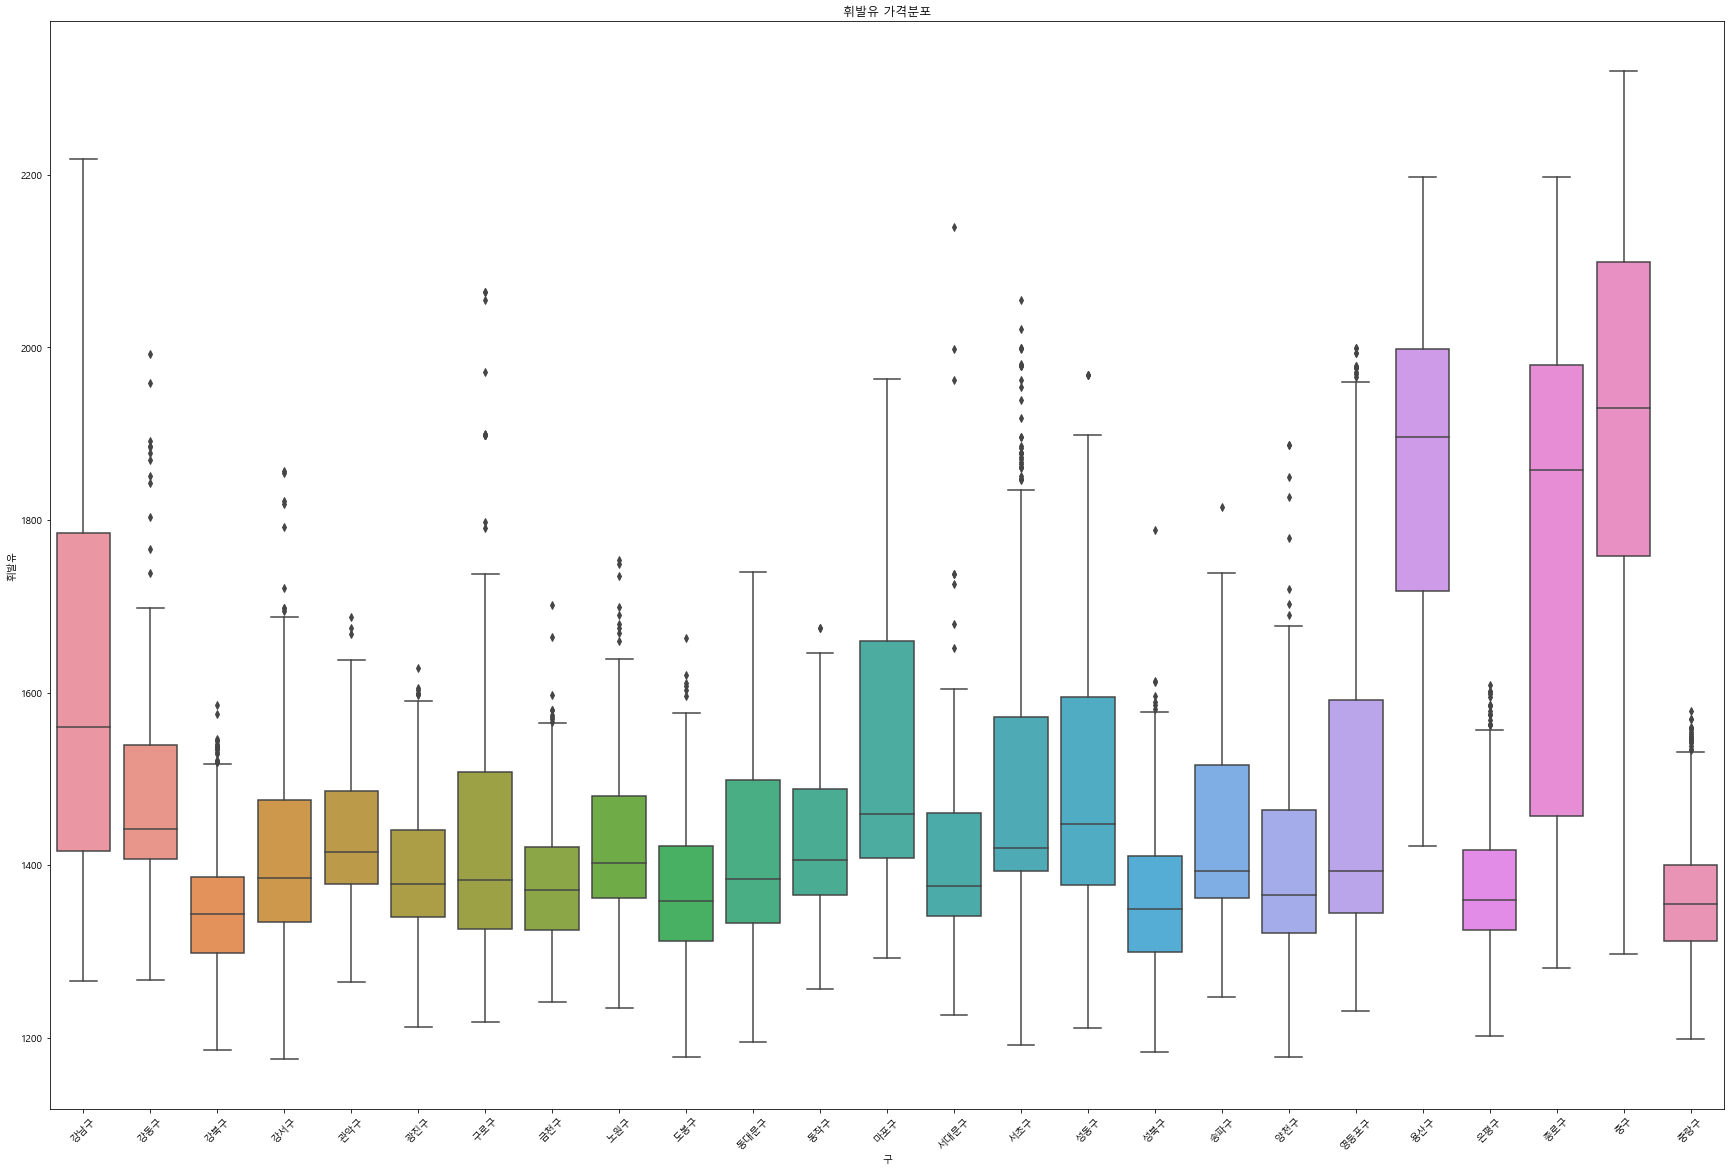

In [15]:
#휘발유
plt.figure(figsize=(30,20))
sns.boxplot(x = '구', y = '휘발유', data=df)
plt.title('휘발유 가격분포')
plt.xticks(rotation=45)
plt.show()

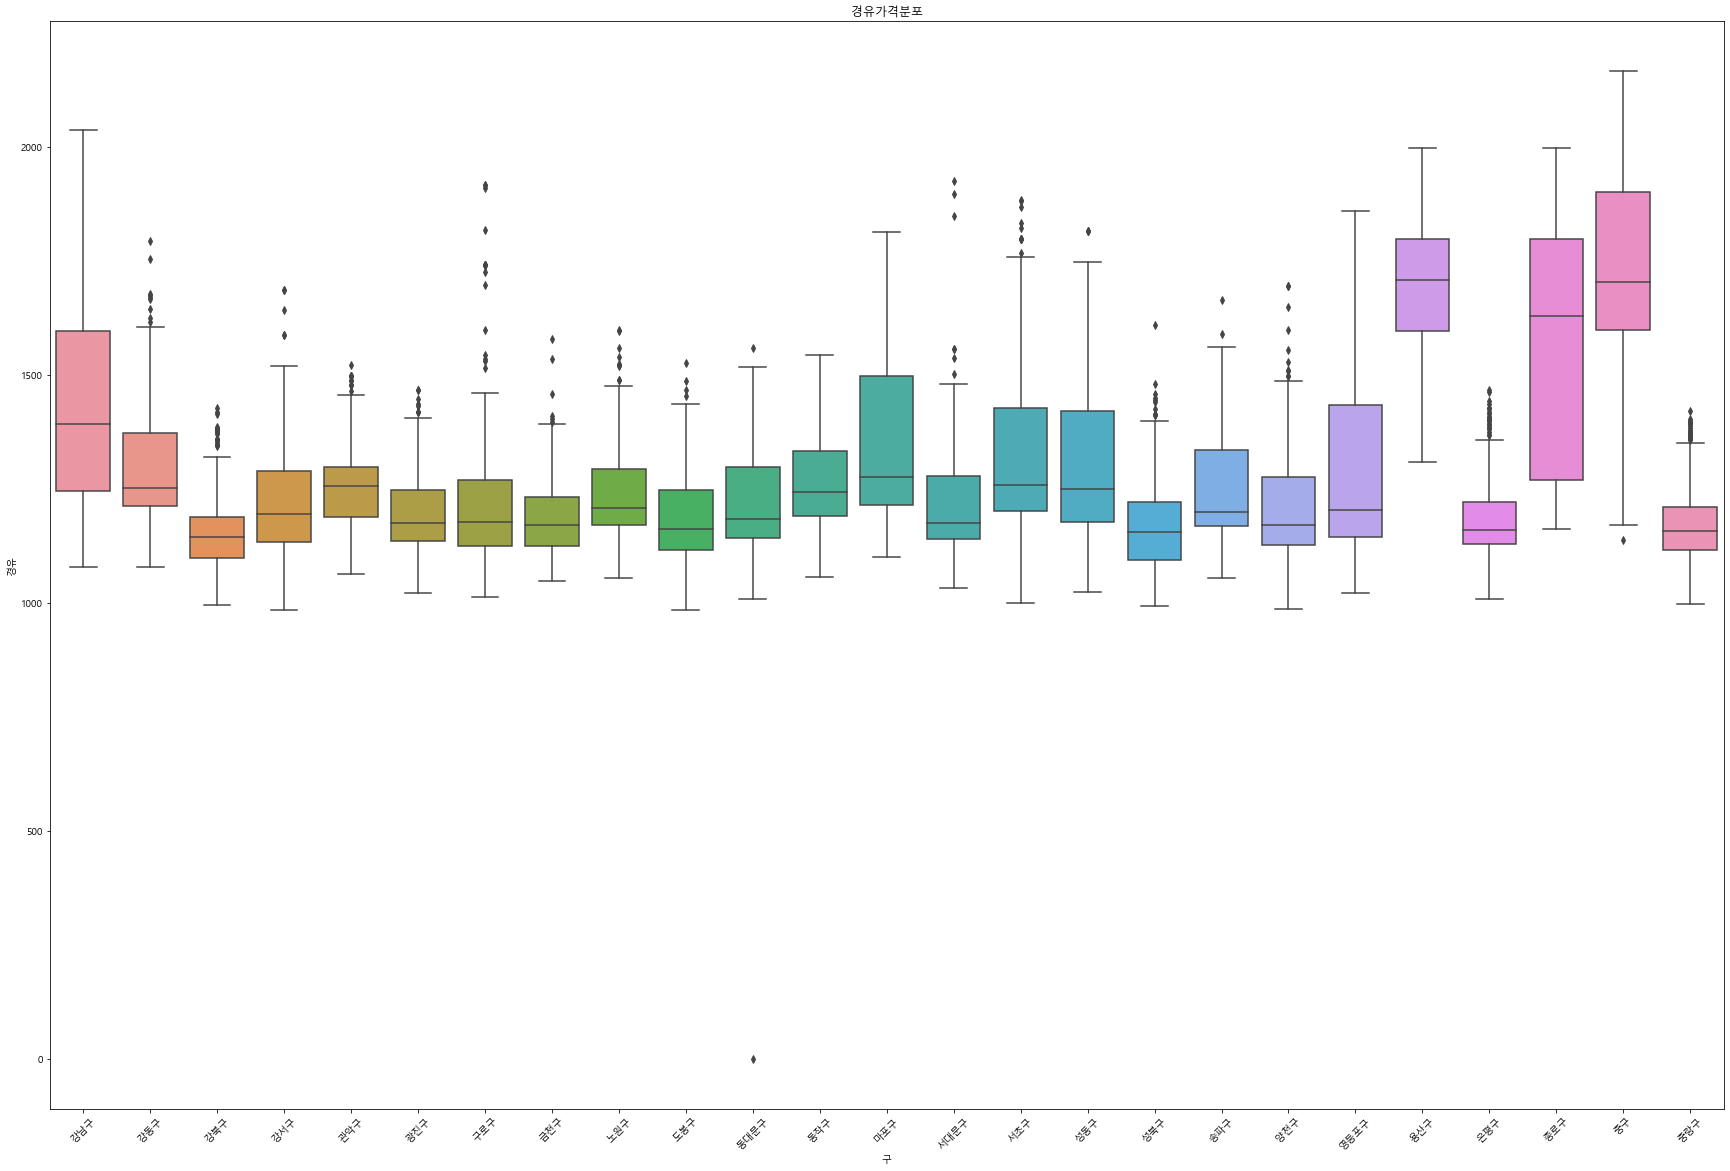

In [16]:
#경유
plt.figure(figsize=(30,20))
sns.boxplot(x = '구', y = '경유', data=df)
plt.title('경유가격분포')
plt.xticks(rotation=45)
plt.show()

## 분석결과
    휘발유 가격 분포도에 따르면,강남구와 중구에서 가격 차이가 큰 데이터를 가지고 있고,
     평균적으로 가장 비싼 지역구는 중구이며,평균적으로 저렴한 지역구는 강북구 인것을 알수 있다.
     경유 가격 분포도 또한 비슷한 가격 분포도정도를 나타내고 있는것을 알수 있다.


## Result 2. 고급 휘발유와 실내 등유를 취급하는 주유소가 위치한 지역 추이
    

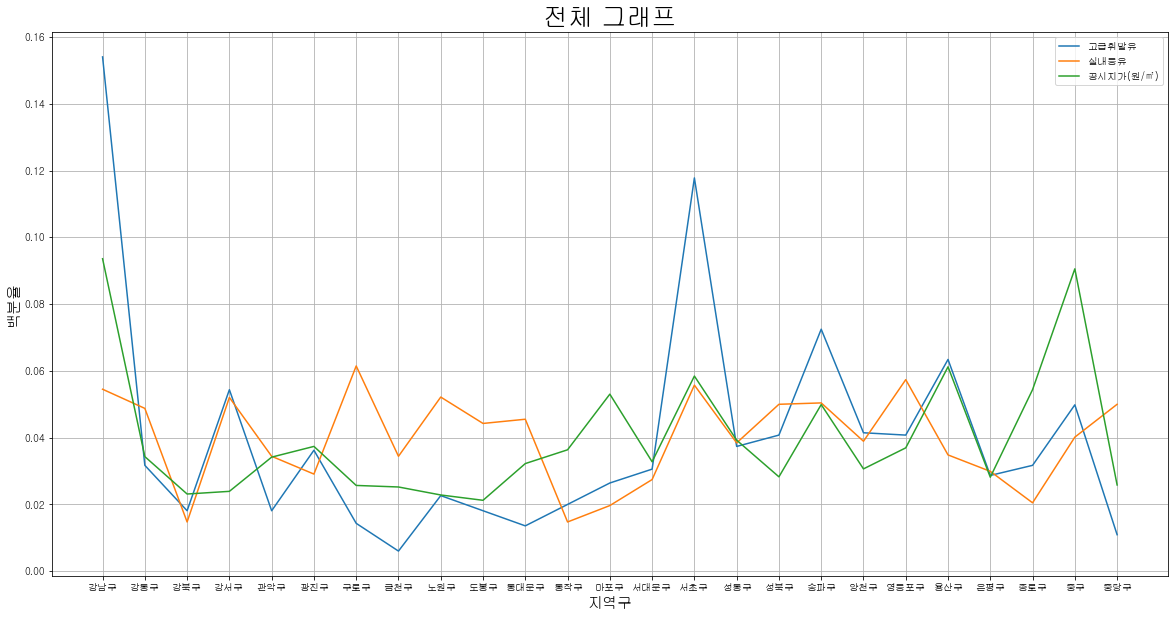

In [17]:

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

plt.rcParams["figure.figsize"] = (20,10)


x = result_100['구']
y1 = result_100['고급휘발유']
y2 = result_100['실내등유']
y3 =result_100['공시지가(원/㎡)']
plt.grid(True)

plt.plot(x,y1,label='고급휘발유')
plt.plot(x,y2,label='실내등유')
plt.plot(x,y3,label='공시지가(원/㎡)')

plt.legend()
plt.title('전체 그래프',fontsize=25)
plt.xlabel('지역구',fontsize=15)
plt.ylabel('백분율',fontsize=15)
plt.show()

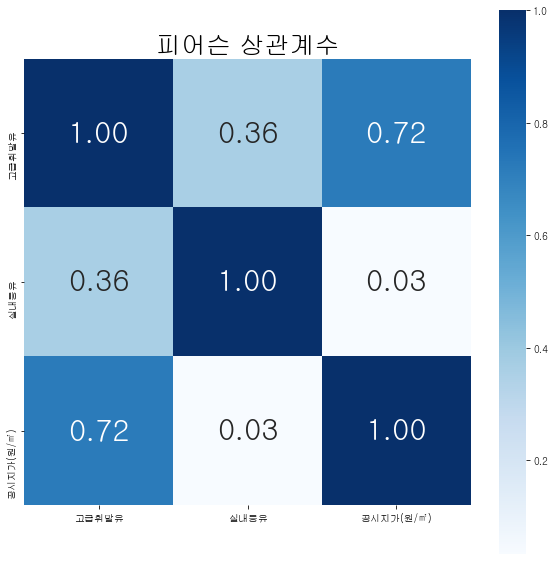

In [18]:
plt.figure(figsize=(10,10))
plt.title('피어슨 상관계수',fontsize=25) #1에 가까울수록(색이 진할수록) 상관관계가 높다)

result_100_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 30}, fmt = '.2f', square = True, cmap = 'Blues')

### 분석결과

    고급휘발유는 보통 압축비가 높은 엔진과 고성능차량에 권장되기 때문에 부유한 지역 주민일수록 수요가 많아 해당 휘발유를 취급하는 주유소가 더 많을 것이라 예상했다. 분석결과 고급휘발유를 취급하는 주유소와 공시지가는 강한 상관관계를 가지고 있어 예상이 어느정도 맞다고 생각할 수 있다. 반대로 실내등유는 지역과는 상관 없는 요인이라고 예상했는데 분석결과 거의 관계없는것을 알수 있다. 

## Result 3. 석유 종류별 가격 평균값을 구해서 평균 이상과 이하 주유소의 지역 분포도
    

In [19]:
avg1=df.mean() #서울 휘발유,경유 평균 
avg1_list=df.groupby('구').mean().reset_index() #구별로 그룹화하여 평균

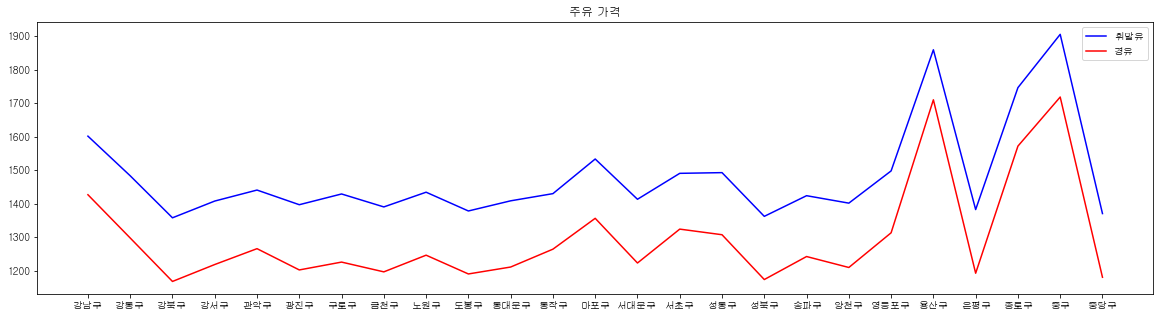

In [20]:
# 구별 평균 휘발유, 경유 가격 시각화 
plt.figure(figsize=(20,5))
plt.plot(avg1_list['구'],avg1_list['휘발유'],'b',label='휘발유')
plt.plot(avg1_list['구'],avg1_list['경유'],'r',label='경유')
plt.legend()
plt.title('주유 가격')
plt.show()

> 휘발유와 경유 가격이 가장 높은 지역 : 중구, 용산구  
> 휘발유와 경유 가격이 가장 낮은 지역 : 강북구, 성북구


In [21]:
avg1_sort=avg1_list.sort_values('휘발유',ascending=False)  #휘발유 가격 기준으로 내림차순 정렬 
avg2_sort=avg1_list.sort_values('경유',ascending=False) #경유 가격 기준으로 내림차순 정렬

> 서울시 전체 휘발유 평균 가격: 1470.605846원   
> 서울시 전체 경유 평균 가격: 1286.655999원 

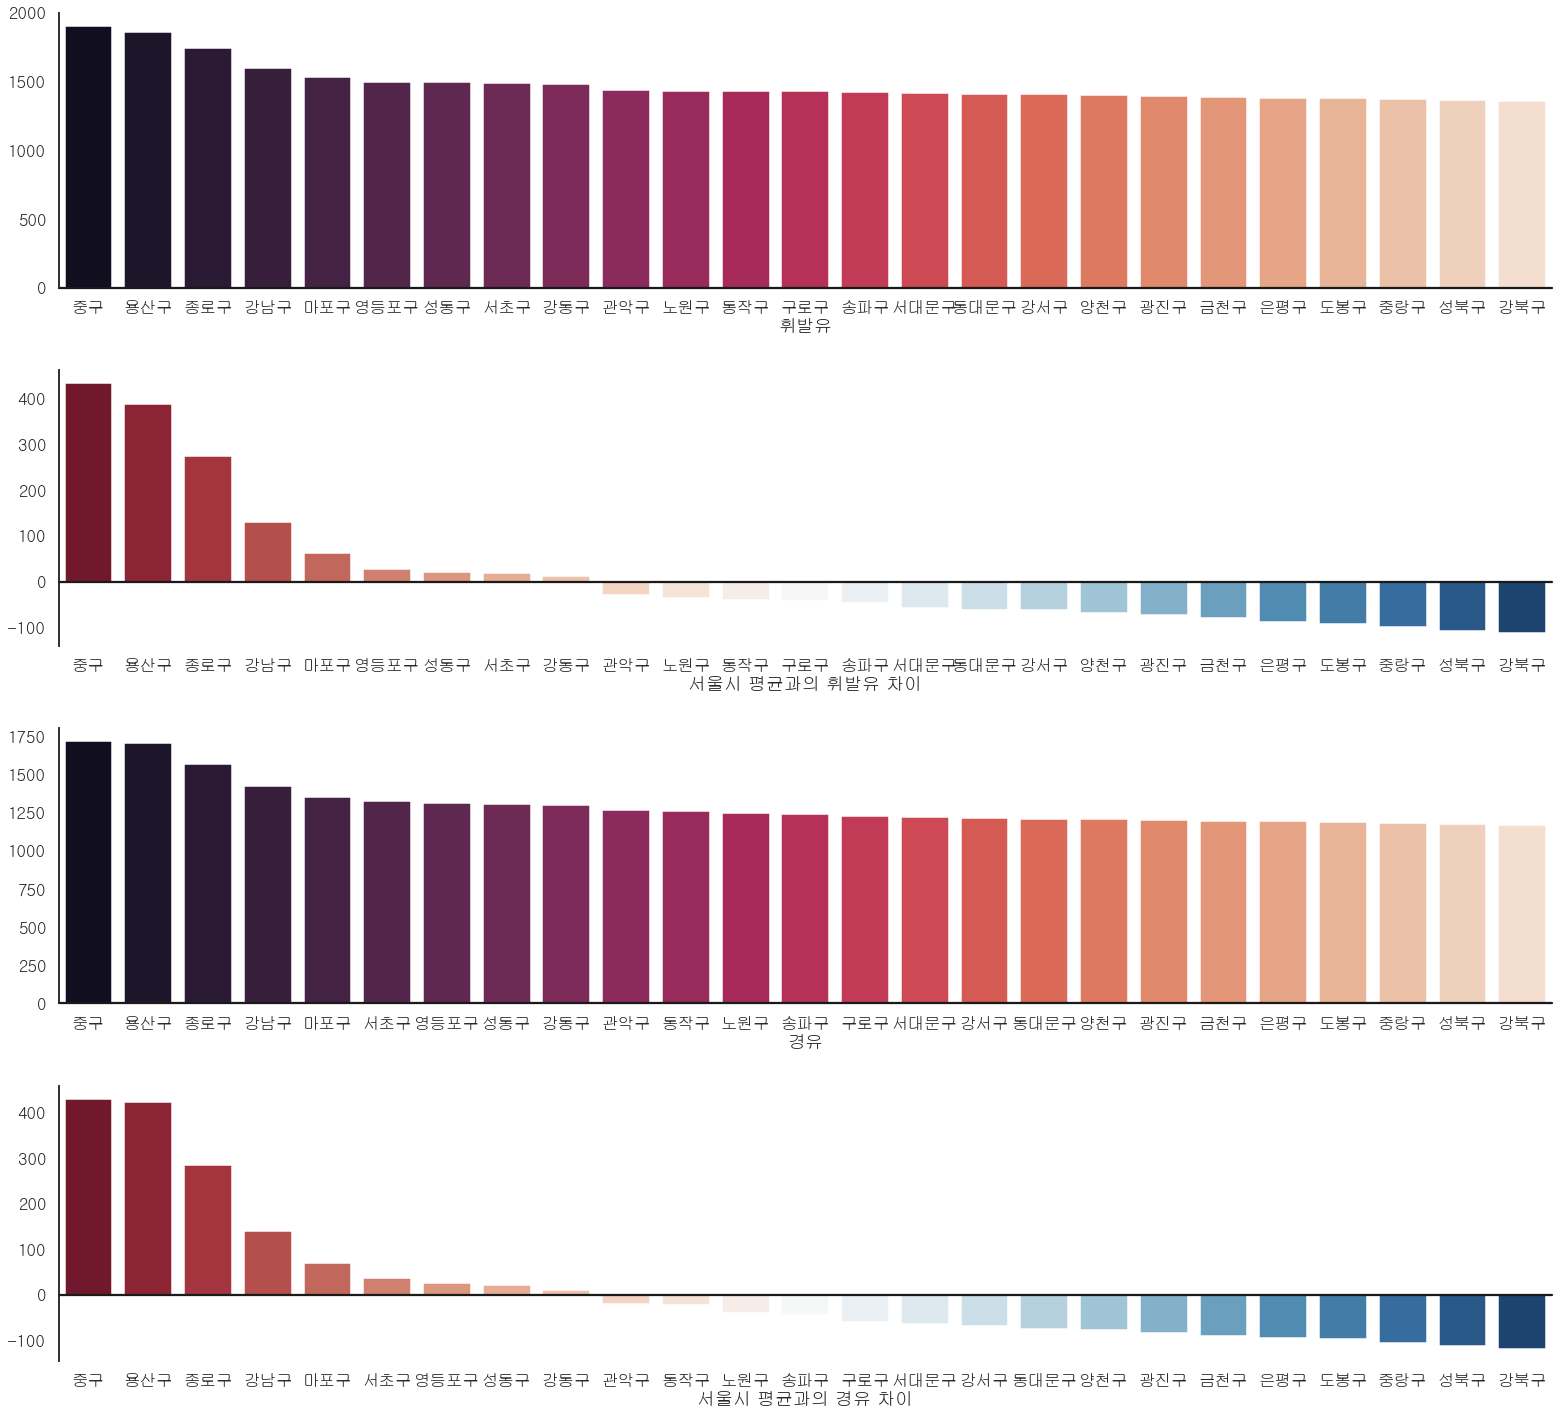

In [22]:
sns.set_theme(style="white", context="talk") 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

# Set up the matplotlib figure
f, (ax1, ax2,ax3,ax4) = plt.subplots(4, 1, figsize=(22, 20))

# 첫번째 그래프
sns.barplot(x="구", y="휘발유", palette="rocket",data=avg1_sort,ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("")
ax1.set_xlabel('휘발유')

# 두번째 그래프
y2 = avg1_sort['휘발유']-avg1['휘발유']

sns.barplot(x="구", y=y2, palette="RdBu",data=avg1_sort, ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("")
ax2.set_xlabel('서울시 평균과의 휘발유 차이')

# 세번째 그래프
sns.barplot(x="구", y="경유", palette="rocket",data=avg2_sort,ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("")
ax3.set_xlabel('경유')

# 네번째 그래프
y2 = avg2_sort['경유']-avg1['경유']

sns.barplot(x="구", y=y2, palette="RdBu",data=avg2_sort, ax=ax4)
ax4.axhline(0, color="k", clip_on=False)
ax4.set_ylabel("")
ax4.set_xlabel('서울시 평균과의 경유 차이')


# Finalize the plot
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

### 분석결과 
    휘발유와 경유 모두 서울시 평균 가격보다 비싼 지역은 최대 400원 가량, 저렴한 지역은 -100원 가량 차이가 나는 것을 알 수 있다.

## Result 4. 월별,계절별 판매 가격 변동 추이

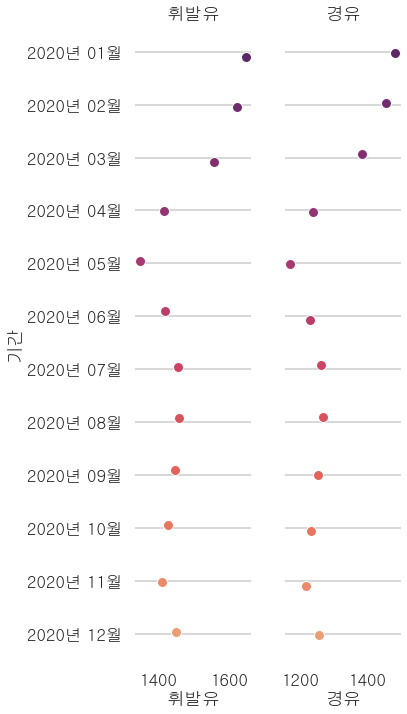

In [23]:
# Make the PairGrid
g = sns.PairGrid(monthResult,
                 x_vars=monthResult.columns[1:3],y_vars='기간',
                 height=10, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=10,
      palette="flare_r", linewidth=1, edgecolor="w")


# Use semantically meaningful titles for the columns
titles = ["휘발유", "경유"]

for ax, title in zip(g.axes.flat, titles):
    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

    
    월별 휘발유, 경유 값의 평균은 경유가 더 낮았지만 가격 변동은 거의 동일하게 나타났다.
    월별 휘발유, 경유의 평균값이 가장 높은 달 : 1월
    월별 휘발유, 경유의 평균값이 가장 낮은 달 : 5월

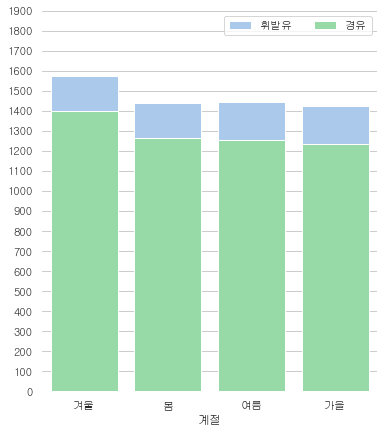

In [24]:
sns.set_theme(style="whitegrid")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'
# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 7))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="index", y="휘발유", data=qResult,
            label="휘발유", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("pastel")
sns.barplot(x="index", y="경유", data=qResult,
            label="경유", color="g")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set(yticks=np.arange(0,2000,100), ylabel="",
       xlabel="계절")
sns.despine(left=True, bottom=True)

    계절별 휘발유, 경유 값의 평균은 경유가 더 작다.
    
    휘발유는 겨울, 여름, 봄, 가을 순으로 값이 작아진다.
    경유는 겨울, 봄, 여름, 가을 순으로 값이 작아진다.
    
    계절별 휘발유, 경유의 평균값이 가장 높은 계절 : 겨울
    계절별 휘발유, 경유의 평균값이 가장 낮은 계절 : 가을

### 분석결과
    월별로 가격이 제일 높은 달은 1월이고 계절별로 봤을 때도 겨울이 가장 가격이 높은 것으로 보아, 난방장치의 사용량의 증가로 더 많은 사람들이 많이 구매하게 되어 가격이 상승한 것으로 유추할 수 있다.

## Result 5.구별 휘발유 가격에 따른 총 자동차 등록 대수 그래프
    Scatterplot,Matplotlib 이중 Y축 그래프 활용
    


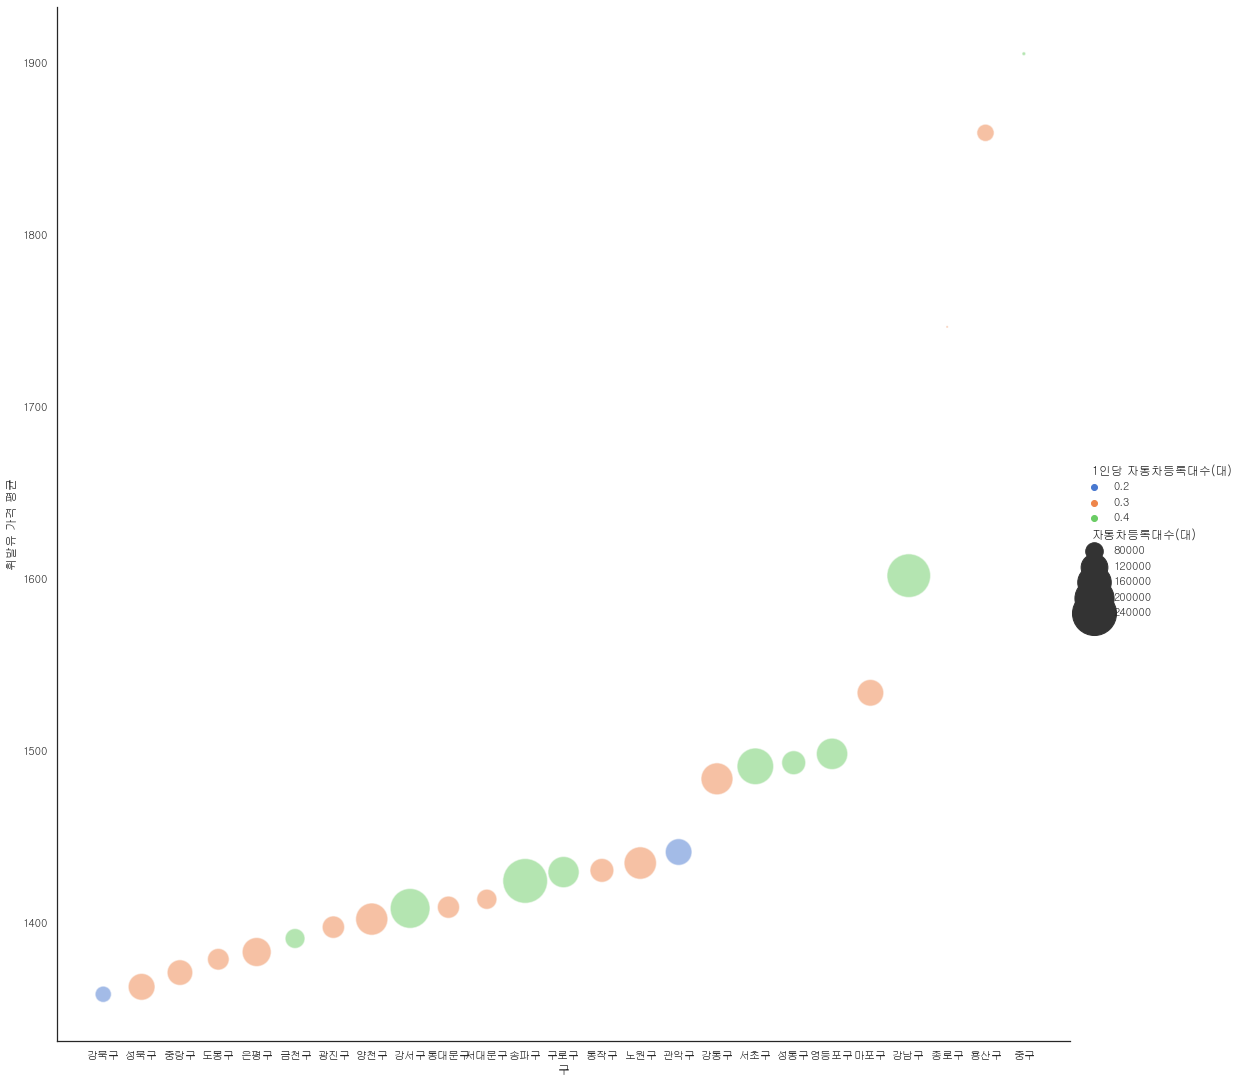

In [25]:
sns.set_theme(style="white")
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="구", y="휘발유 가격 평균", hue="1인당 자동차등록대수(대)", size="자동차등록대수(대)",
            sizes=(5, 2000), alpha=.5, palette="muted",
            height=15, data=result1_sorted_by_values)


휘발유 가장 높은 곳과 낮은 곳의 인구대비 1인당 자동차 등록수가 같은 값으로 결과가 나와, 해당 요인은 가격 결정에 크게 영향을 미치지 않는 것으로 보인다. 
그래서 자동차 총 등록대수 대비 가격 변동을 더 자세히 알아보기 위해 주 요인을 바로 비교할 수 있는 이중 Y축 그래프를 활용했다.

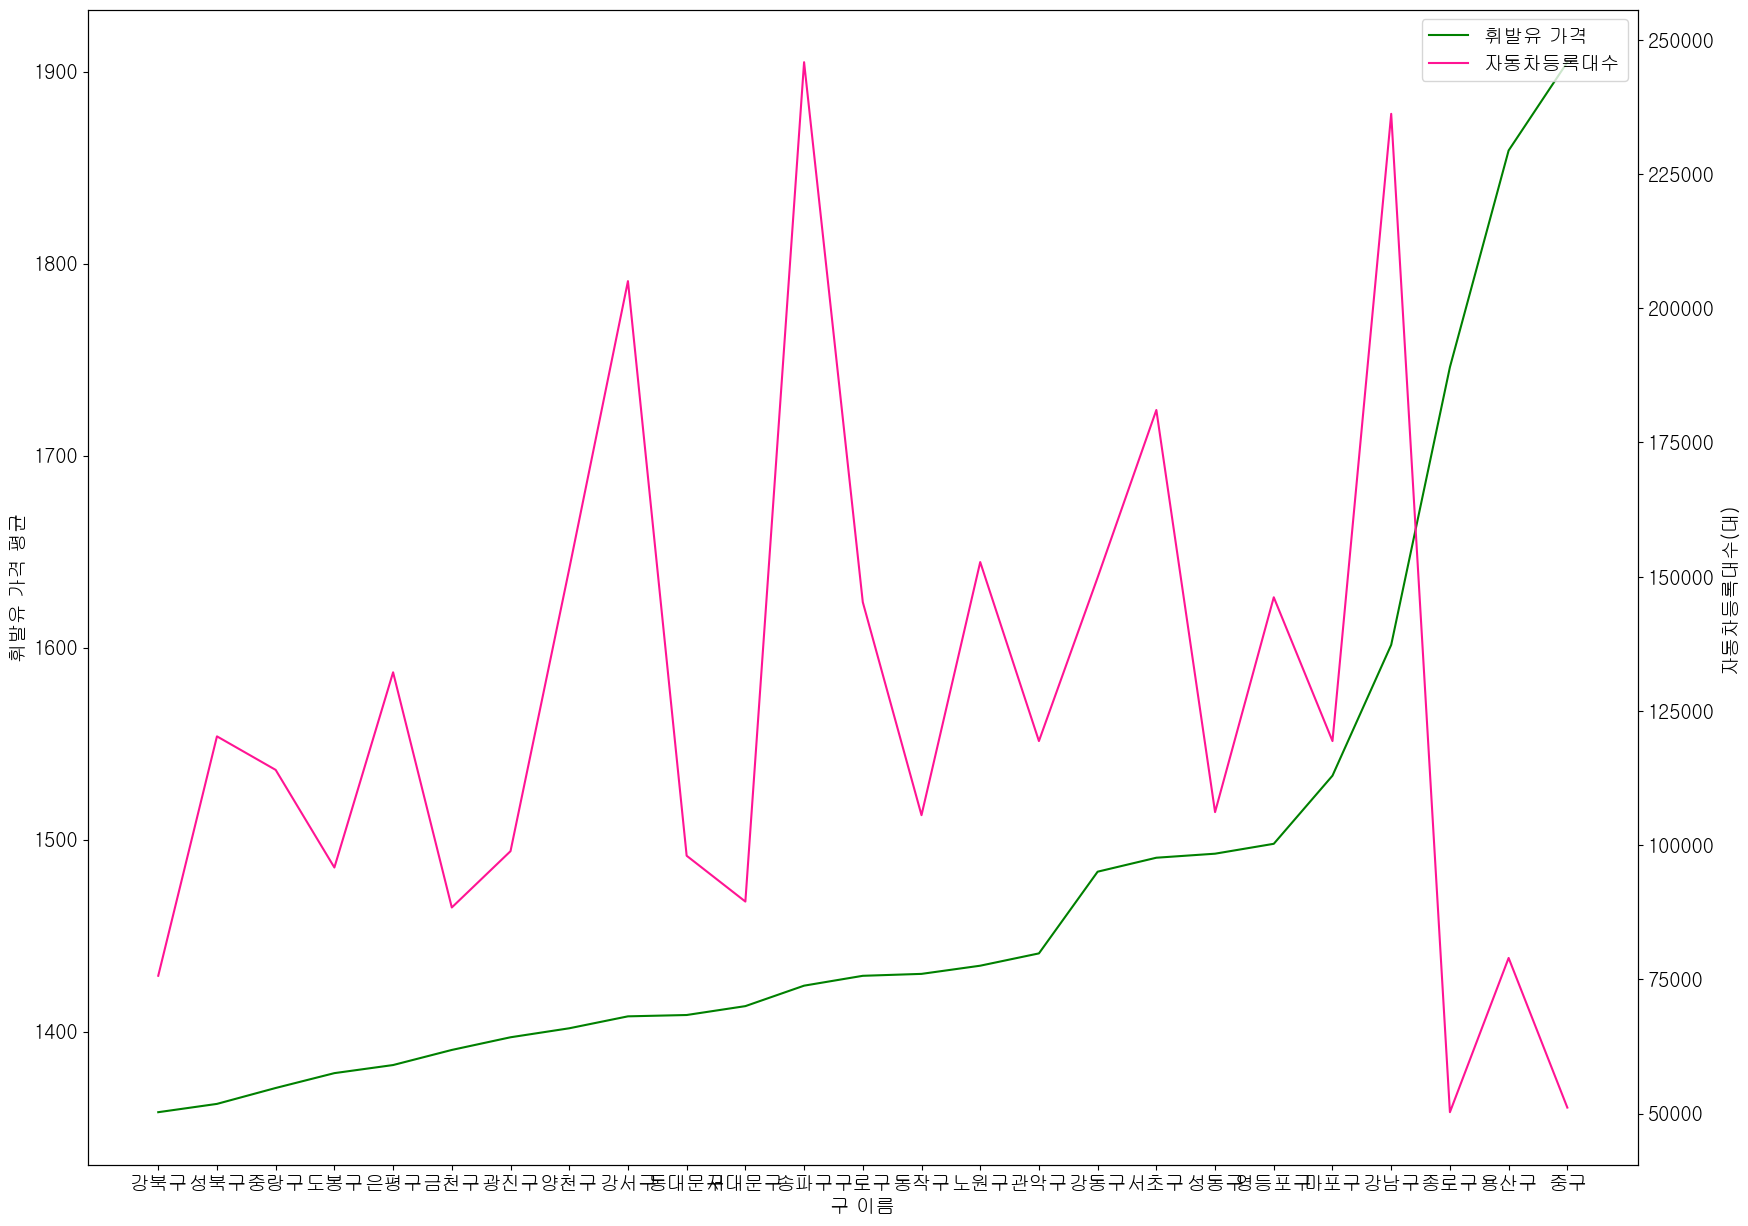

In [26]:
plt.rcParams['font.family'] = 'NanumSquareR'
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

x = result1_sorted_by_values['구']
y1 = result1_sorted_by_values['휘발유 가격 평균']
y2 = result1_sorted_by_values['자동차등록대수(대)']

fig, ax1 = plt.subplots()
ax1.set_xlabel('구 이름')
ax1.set_ylabel('휘발유 가격 평균')
line1 = ax1.plot(x, y1, color='green', label='휘발유 가격')

ax2 = ax1.twinx()
ax2.set_ylabel('자동차등록대수(대)')
line2 = ax2.plot(x, y2, color='deeppink', label='자동차등록대수')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
plt.show()

휘발유 가격이 1700원 이상이 되는 곳에서 자동차 등록 대수가 현저히 낮아지는 것을 확인했다. 자동차 등록대수가 적을 수록 주유소는 비싼 가격을 유지하는 것으로 유추해볼 수 있다.

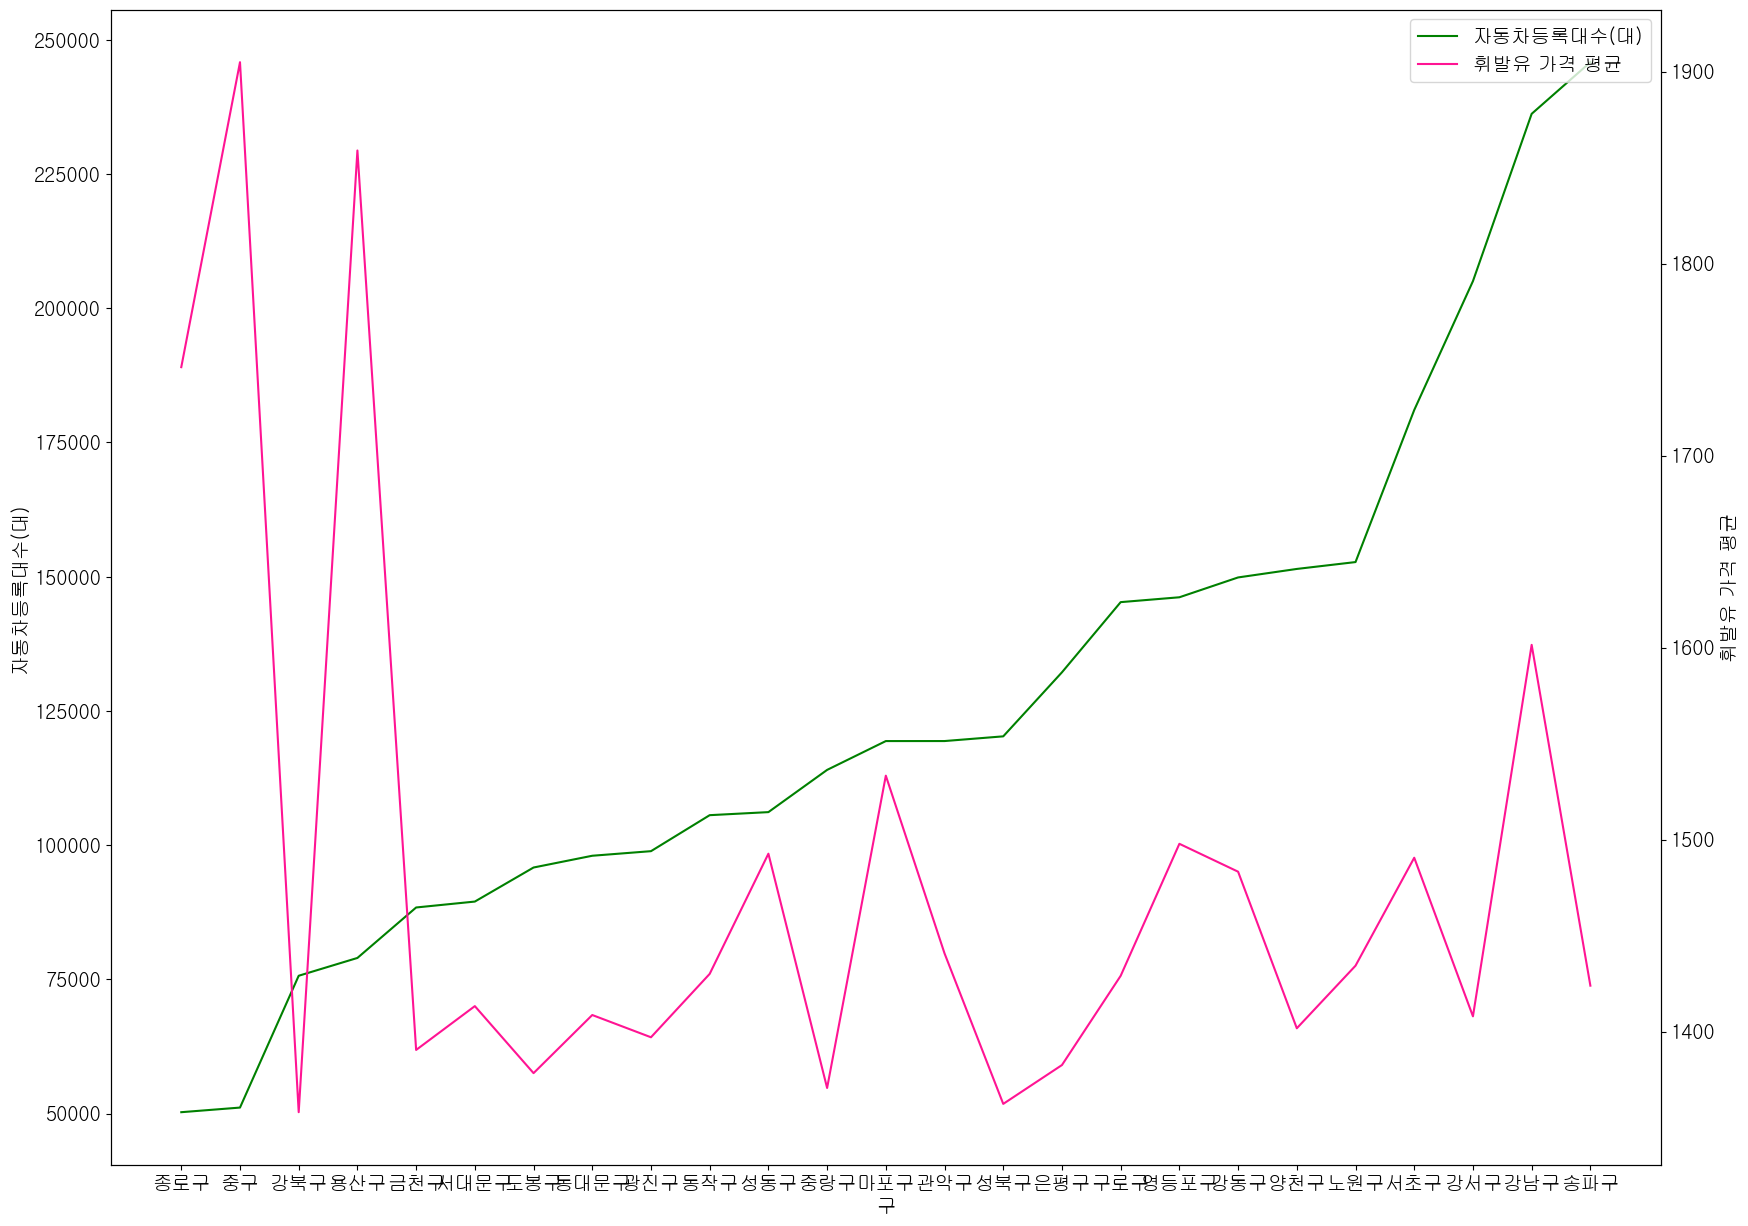

In [27]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (20, 15)
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Gulim'

x = result1_sorted_by_values2['구']
y1 = result1_sorted_by_values2['자동차등록대수(대)']
y2 = result1_sorted_by_values2['휘발유 가격 평균']

fig, ax1 = plt.subplots()
ax1.set_xlabel('구')
ax1.set_ylabel('자동차등록대수(대)')
line1 = ax1.plot(x, y1, color='green', label='자동차등록대수(대)')

ax2 = ax1.twinx()
ax2.set_ylabel('휘발유 가격 평균')
line2 = ax2.plot(x, y2, color='deeppink', label='휘발유 가격 평균')

lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper right')
plt.show()

자동차 등록대수 증가 그래프에서 해당 경향을 더 확연히 볼 수 있다.

### 분석결과
초기에 설정한 구별 1인당 차량대수와 총 차량 대수가 많을 수록 주유소 가격 경쟁력이 높아져 전체 평균 가격이 내려갈 것이다라는 가정은 서로 영향을 준다고 판단하기에는 어려워보인다. 하지만, 차량 등록대수가 적을수록 주유소 가격이 높아지는 것은 어느정도의 경향이 더 뚜렷하게 나타났음을 알 수 있었다.  

## Result 6. 전기차 보유 증가에 따른 석유 종류별 가격 변동 추이

    

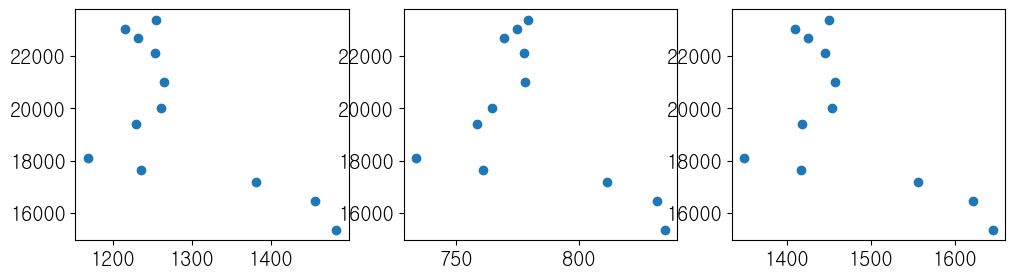

In [28]:
plt.figure(figsize=(12,3))
plt.subplot(131)
plt.scatter(result6["경유"],result6["전기"])
plt.subplot(132)
plt.scatter(result6["고급휘발유"],result6["전기"])
plt.subplot(133)
plt.scatter(result6["휘발유"],result6["전기"])
plt.show()

- **시각화의 결과를 보게 되면 처음에 전기자동차 차량 등록수와 경유, 고급휘발유, 휘발유 각각의 관계를 알아보고자 산점도 그래프로 그려보았다. 하지만 데이터의 관계가 명확하지가 않다.**

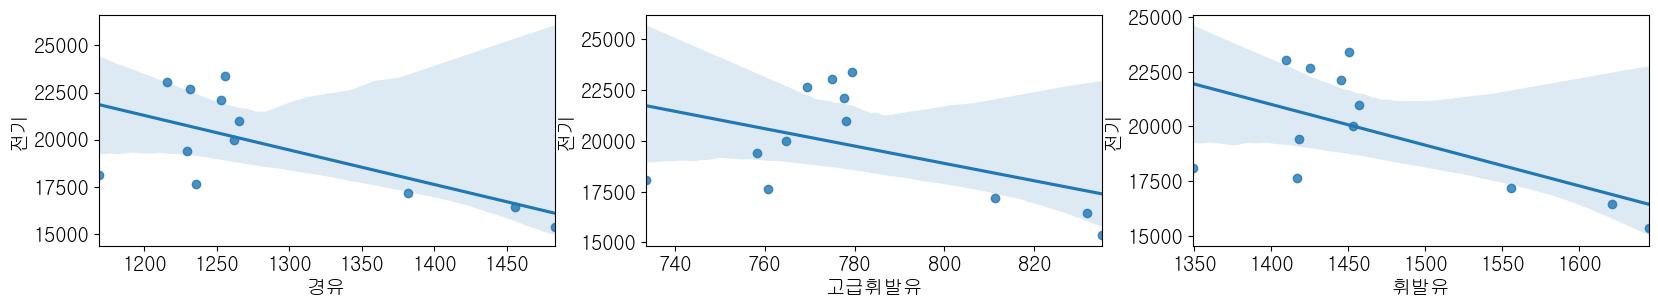

In [29]:
plt.figure(figsize=(20,3))
plt.subplot(131)
sns.regplot(x=result6["경유"],y=result6["전기"],fit_reg=True)
plt.subplot(132)
sns.regplot(x=result6["고급휘발유"],y=result6["전기"],fit_reg=True)
plt.subplot(133)
sns.regplot(x=result6["휘발유"],y=result6["전기"],fit_reg=True)
plt.show()

- **각각의 관계가 양의 관계인지 음의 관계인지가 명확하지가 않아서 regplot으로 추세선까지 그려보았다. 추세선을 보게 되면 전반적으로 음의 관계가 나온다.**

### 분석결과

    예상했던 분석의 결과는 전기차 보유 증가에 따라서 유류세 가격이 낮아진다는 것이다. 전체적으로 그래프의 추세선이 음의 방향이기는 하다. 그러나 아무래도 2020년도의 월별 자료여서 데이터의 개수가 12개 밖에 되지 않고 추세선으로부터 데이터들이 멀리 떨어져 있는 데이터가 많아서 약한 관계이다. 물론 더 구체적으로 봐야하겠지만 전기차 보유의 증가와 유류세 가격은 현재까지는 서로 인과관계가 있다고 보기 힘들다.

# 4. 결과
    1) 휘발유 가격 분포도에 따르면,강남구와 중구에서 가격 차이가 큰 데이터를 가지고 있고, 평균적으로 가장 비싼 지역구는 중구이며,평균적으로 저렴한 지역구는 강북구 인것을 알수 있다.
     경유 가격 분포도 또한 비슷한 가격 분포도정도를 나타내고 있는것을 알수 있다.
    2) 고급휘발유를 취급하는 주유소와 공시지가는 강한 상관관계를 가지고 있다. 반대로 실내등유는 지역의 공시지가와는 거의 관계없는 요인임을 알수 있다. 
    3) 휘발유와 경유 가격이 가장 높은 지역은 중구와 용산구이고, 휘발유와 경유 가격이 가장 낮은 지역은 강북구, 성북구로 휘발유와 경유 모두 서울시 평균 가격보다 비싼 지역은 최대 400원 가량, 저렴한 지역은 -100원 가량 차이가 나는 것을 알 수 있다.
    4) 월별로 가격이 제일 높은 달은 1월이고 계절별로 봤을 때도 겨울이 가장 가격이 높은 것으로 보아, 난방장치의 사용량의 증가로 더 많은 사람들이 많이 구매하게 되어 가격이 상승한 것으로 보인다.
    5) 지역(구) 내 차량 등록대수가 적을수록  가격이 높아지는 경향성이 나타나는 것으로 보아 잠재 고객의 수가 적어지면 주유소 간의 가격 경쟁도가 약화되는 것으로 유추된다. 
    6) 서울시 내 전기차 보유의 증가와 유류세 평균 가격 변동은 서로 인과관계가 있다고 보기 힘들다.